# Volume 4: Animation
    Benj McMullin
    Math 403
    9/11/2023

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [4]:
animation.writer = animation.writers['ffmpeg']

## Problem 1

Use the FuncAnimation class to animate the function $y = \sin(x + 3t)$ where $x \in [0, 2\pi]$, and t ranges from 0 to 10 seconds.
Embed your animation into the notebook.

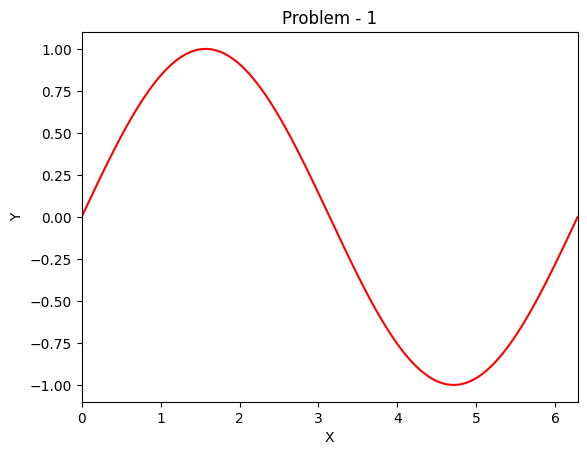

In [5]:
# Create x data from 0 to 2pi and t data from 0 to 10 seconds
xs = np.linspace(0, 2*np.pi, 1000)
ts = np.linspace(0, 10, 1000)

# Make the figure and axis objects
figure = plt.figure()
axis = figure.add_subplot(111)
plt.xlim([0, 2 * np.pi])
plt.ylim([-1.1, 1.1])
plt.title("Problem - 1")
plt.xlabel("X")
plt.ylabel('Y')

# Create the line object
line, = axis.plot([], [], 'r-')

# Update function
def update(t):
    # Update the line object
    line.set_data(xs, np.sin(xs+3*t))

# Create the animation
my_interval = np.ceil(10000 / (1000 - 1))
ani = animation.FuncAnimation(figure, update, frames=ts, interval=my_interval)
ani.save("problem1.mp4")

<video src="problem1.mp4" controls>

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the planet orbits, the starting positions of each planet as a point, and the position of the sun as a point, and compare your results with Figure 1.1. Make sure to include a legend.

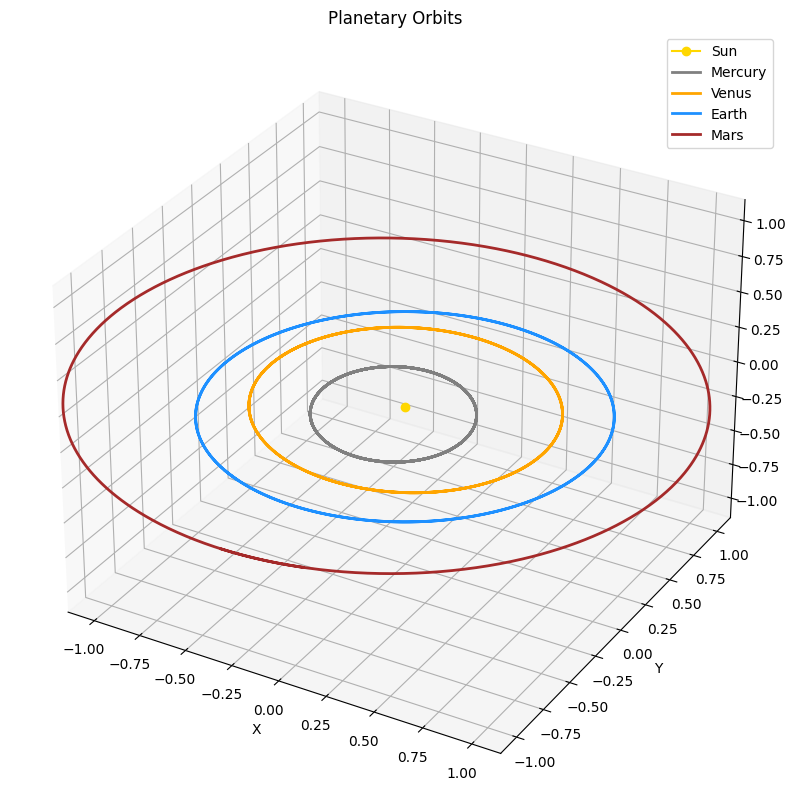

In [6]:
# Load in orbits.npz data
orbits_data = np.load('orbits.npz')

# Get the data for each planet
planets = ['mercury', 'venus', 'earth', 'mars']
colors = ['gray', 'orange', 'dodgerblue', 'brown']

# Make the figure and axis objects
figure = plt.figure()
axis = figure.add_subplot(111, projection = '3d')
figure.set_size_inches(10, 10)

# Set the axis limits
axis.set_xlim3d([-1.1, 1.1])
axis.set_ylim3d([-1.1, 1.1])
axis.set_zlim3d([-1.1, 1.1])

# Set the title and axis labels
plt.title("Planetary Orbits")
plt.xlabel("X")
plt.ylabel('Y')

# Plot the sun
axis.plot3D(0, 0, 0, 'gold', marker = 'o', markersize = 6, label = "Sun")

# Plot the orbit for each planet
for planet, color in zip(planets, colors):
    axis.plot3D(*orbits_data[planet].T, color, lw = 2, label = planet.capitalize())

plt.legend()
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the sun and current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Include a legend, and embed your animation in the notebook.

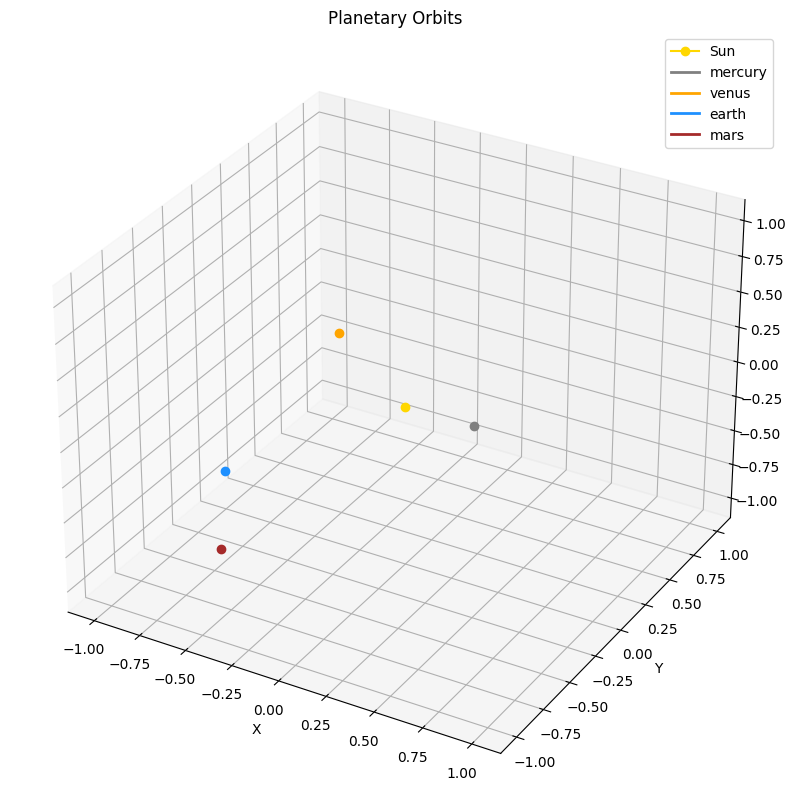

In [7]:
# Load in orbits.npz data
orbits_data = np.load('orbits.npz')

# Create arrays of planet names and colors
planets = ['mercury', 'venus', 'earth', 'mars']
colors = ['gray', 'orange', 'dodgerblue', 'brown']

# Create the figure and axis objects
# Set up plot
figure = plt.figure()
axis = figure.add_subplot(111, projection = '3d')
figure.set_size_inches(10, 10)
axis.set_xlim3d([-1.1, 1.1])
axis.set_ylim3d([-1.1, 1.1])
axis.set_zlim3d([-1.1, 1.1])
axis.plot3D(0, 0, 0, 'gold', marker = 'o', markersize = 6, label = "Sun")

# Define lines/points to animate
lines = [axis.plot([], [], [], color, lw = 2, label = planet)[0] for planet, color in zip(planets, colors)]
points = [axis.plot([], [], [], color, marker = 'o', markersize = 6)[0] for _, color in zip(planets, colors)]

# Create data dictionary
# Each planet has a key and a value of an array of x, y, z coordinates
def update(t):
    for planet, line, point in zip(planets, lines, points):
        # Update line
        line.set_data(orbits_data[planet][:t + 2, 0], orbits_data[planet][:t + 2, 1])
        line.set_3d_properties(orbits_data[planet][:t + 2, 2])
        
        # Update point
        point.set_data([orbits_data[planet][t, 0]], [orbits_data[planet][t, 1]])
        point.set_3d_properties([orbits_data[planet][t, 2]], 'z')

# Create the animation
axis.legend()
plt.title("Planetary Orbits")
plt.xlabel("X")
plt.ylabel('Y')
ani = animation.FuncAnimation(figure, update, frames=range(1400), interval=round(1000//60))
ani.save("problem3.mp4")

<video src="problem3.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{\det(2\pi\Sigma)}}\exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

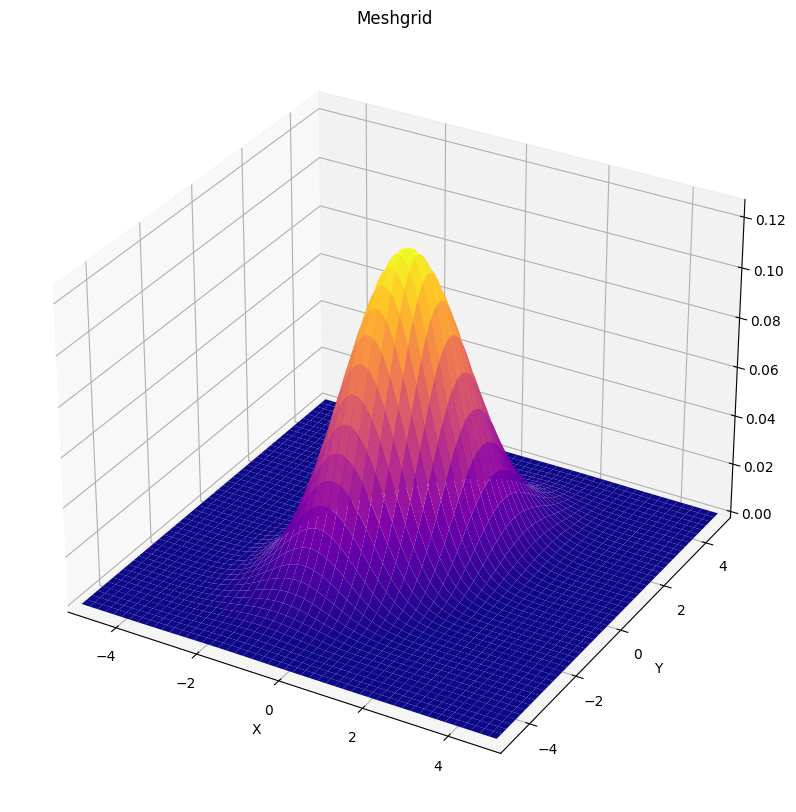

In [8]:
# Create sigma matrix
sigma = np.array([[1, 3/5], [3/5, 2]])

# Create meshgrid
X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))

# Create the figure and axis objects
# Set up plot
figure = plt.figure()
axis = figure.add_subplot(111, projection = '3d')
figure.set_size_inches(10, 10)
axis.set_xlim3d([-5, 5])
axis.set_ylim3d([-5, 5])
plt.title("Meshgrid")
plt.xlabel("X")
plt.ylabel('Y')

# Create the surface plot
# Define function
f = lambda x: 1 / (np.sqrt(np.linalg.det(2 * np.pi * sigma))) * np.exp(-0.5 * x @ np.linalg.inv(sigma) @ x)

# Create Z data
Z = np.zeros_like(X)
# Loop through each element in Z and calculate the value
for k in range(X.shape[0]):
    for l in range(X.shape[1]):
        Z[k, l] = f(np.array([X[k, l], Y[k, l]]))

# Plot the surface
axis.plot_surface(X, Y, Z, cmap='plasma')
plt.show()

































## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Embed the animation in the notebook.

In [9]:
plt.ioff()

# Load in vibration.npz data
vibration_data = np.load('vibration.npz')
X = vibration_data['X']
Y = vibration_data['Y']
Z = vibration_data['Z']

# Create the figure and axis objects
# Set up plot
figure = plt.figure()
axis = figure.add_subplot(111, projection = '3d')
figure.set_size_inches(10, 10)
axis.set_xlim3d([0, 2])
axis.set_ylim3d([0, 3])
axis.set_zlim3d([0, 5])
axis.set_xlabel("X")
axis.set_ylabel('Y')
axis.set_title("Vibrations")

# Create the surface plot
# Plot the surface
line, = axis.plot([], [], 'r-')

# Update function
def update(t):
    axis.clear()
    axis.plot_surface(X, Y, Z[t], cmap = 'plasma')
    axis.set_xlim3d([0, 2])
    axis.set_ylim3d([0, 3])
    axis.set_zlim3d([0, 5])
    axis.set_xlabel("X")
    axis.set_ylabel('Y')
    axis.set_title("Vibrations")

# Create the animation
ani = animation.FuncAnimation(figure, update, frames = range(150), interval = 20)
ani.save("problem5.mp4")

<video src="problem5.mp4" controls>


### Don't forget to push your .mp4 animation files!